In [385]:
from __future__ import print_function
import pandas as pd
import igraph as ig
import numpy as np
import pandas as pd
import sys
sys.path.append('../../')
import kang
from intermine.webservice import Service
from IPython.display import SVG, display
%matplotlib inline

In [393]:
df_gene_alias = pd.read_csv('http://www.arabidopsis.org/download_files/Public_Data_Releases/TAIR_Data_20141231/gene_aliases_20141231.txt',sep='\t')

In [394]:
df_gene_alias_ix = df_gene_alias.set_index('locus_name')

In [395]:
df_gene_alias_ix.head()

symbol                  full_name
locus_name                                      
18S RRNA     18S RRNA                        NaN
25S RRNA     25S RRNA                        NaN
5.8S RRNA   5.8S RRNA                        NaN
AAN               AAN            ANOTHER ANDANTE
AAR1             AAR1  ALLYL ALCOHOL RESISTANT 1

In [19]:
df_ai1 = pd.read_excel('../../../DroughtNet/AI1/NIHMS316063-supplement-Table_S4.xls')
mask = (df_ai1['AI-1MAIN'] == 1)
df_ai1_main = df_ai1[mask]

In [20]:
df_ai1_main_ix = df_ai1_main.set_index(['TAIR_LOCUS_IDA','TAIR_LOCUS_IDB'])

In [425]:
df_ai1_main_ix.loc['AT1G05410']

AI-1MAIN  AI-1REPEAT  LCI  LCIBINARY  \
TAIR_LOCUS_IDB                                         
AT3G10140              1           0    0          0   
AT4G12450              1           0    0          0   
AT2G32650              1           1    0          0   
AT5G65400              1           0    0          0   
AT1G49850              1           0    0          0   
AT5G61230              1           1    0          0   
AT4G21990              1           1    0          0   
AT3G04860              1           0    0          0   

                LCIBINARY_MULTIPLE_EVIDENCE  
TAIR_LOCUS_IDB                               
AT3G10140                                 0  
AT4G12450                                 0  
AT2G32650                                 0  
AT5G65400                                 0  
AT1G49850                                 0  
AT5G61230                                 0  
AT4G21990                                 0  
AT3G04860                                 0

In [423]:
df_ai1_main_ix.head()

AI-1MAIN  AI-1REPEAT  LCI  LCIBINARY  \
TAIR_LOCUS_IDA TAIR_LOCUS_IDB                                         
AT1G05410      AT3G10140              1           0    0          0   
AT3G54850      AT5G19010              1           0    0          0   
AT3G07780      AT5G66720              1           0    0          0   
AT1G80040      AT5G66720              1           0    0          0   
AT1G09660      AT2G38610              1           0    0          0   

                               LCIBINARY_MULTIPLE_EVIDENCE  
TAIR_LOCUS_IDA TAIR_LOCUS_IDB                               
AT1G05410      AT3G10140                                 0  
AT3G54850      AT5G19010                                 0  
AT3G07780      AT5G66720                                 0  
AT1G80040      AT5G66720                                 0  
AT1G09660      AT2G38610                                 0

In [23]:
genelist_total   = list(set(list(df_ai1_main['TAIR_LOCUS_IDA']) + list(df_ai1_main['TAIR_LOCUS_IDB'])))
genenumber = len(genelist_total)
print('total genenumber is',genenumber)
g = ig.Graph() # igraph class 빙의
g.add_vertices(genenumber) # genenumber에는 총 유전자 숫자가 들어간다.   
dicN2G = dict(zip([x[0] for x in enumerate(genelist_total)],[x[1] for x in enumerate(genelist_total)]))
dicG2N = dict(zip([x[1] for x in enumerate(genelist_total)],[x[0] for x in enumerate(genelist_total)]))
# 번호와 유전자 이름을 대응한 딕셔너리를 만들어 둔다. 

total genenumber is 2661


In [25]:
for gn1,gn2 in df_ai1_main_ix.index: # 연결의 성격에 따라 따로 추가. 윗쪽은 호모로그, 이것은 단백질 상호작용
    #gn1 = df_arainter.loc[each][0].split('.')[0]
    #gn2 = df_arainter.loc[each][1].split('.')[0]
    n_gn1 = dicG2N[gn1]
    n_gn2 = dicG2N[gn2]
    g.add_edges([(n_gn1,n_gn2)])
    edge_idx = g.get_eid(n_gn1,n_gn2)
    g.es[edge_idx]['feature'] = 'interaction'

In [436]:
# betweenness 높은거 끊어줘 보자

In [28]:
layout_kk = g.layout('kk') # layout을 정해준다 보통 fr, kk 중에 골라 쓰면 될듯 딴건 별로 ㅋ
visual_style = {}
#visual_style["vertex_size"] = sub_g.vs.degree() # interaction 수에 따라 vertex크기를 키우라
visual_style["vertex_size"] = 5
#visual_style["vertex_color"] = ['red' if x.split('.')[0] in drought_responsive_genes_list else 'grey' for x in sub_g.vs["name"]] # vertex숫자에 맞는 array로 넣어주면 되기때문에 알아서 잘 색깔을 넣어보자.
#visual_style["vertex_label"] = g.vs["name"]
#visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
#visual_style["edge_color"] = ['red' if x == 'interaction' else 'blue' for x in sub_g.es["feature"]] # edge도 마찬가지
visual_style["layout"] = layout_kk
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 20
ig.plot(g, **visual_style)

In [77]:
dicN2degree = dict(enumerate(g.vs.degree()))

In [343]:
each_cluster_genenumber_list = g.clusters()[0]
each_cluster_degree_list     = [g.vs[x].degree() for x in each_cluster_genenumber_list]
dicN2degree_each_cluster     = dict(zip(each_cluster_genenumber_list,each_cluster_degree_list))

In [355]:
dicN2degree_each_cluster_key = dicN2degree_each_cluster.keys()
dicN2degree_each_cluster_key.sort(key=lambda x : dicN2degree_each_cluster[x],reverse=True)

In [471]:
init_genenumber = dicN2degree_each_cluster_key[0]
print(init_genenumber,dicN2G[init_genenumber],df_gene_alias_ix.loc[dicN2G[init_genenumber]])

1433 AT5G22290              symbol                                    full_name
locus_name                                                      
AT5G22290   anac089             NAC domain containing protein 89
AT5G22290      FSQ6  fructose-sensing quantitative trait locus 6
AT5G22290    NAC089             NAC domain containing protein 89


In [344]:
dicN2degree_each_cluster # the degree is considered to gravity

{0: 2,
 1: 1,
 2: 8,
 4: 1,
 5: 1,
 7: 6,
 8: 2,
 9: 3,
 10: 1,
 11: 1,
 12: 3,
 13: 24,
 14: 1,
 15: 2,
 16: 1,
 17: 1,
 19: 2,
 20: 8,
 21: 1,
 22: 2,
 23: 7,
 24: 1,
 25: 2,
 26: 19,
 28: 1,
 29: 4,
 30: 4,
 31: 1,
 32: 2,
 33: 10,
 34: 2,
 35: 2,
 36: 3,
 37: 1,
 38: 27,
 39: 4,
 40: 3,
 41: 1,
 42: 4,
 43: 1,
 44: 5,
 45: 3,
 46: 1,
 47: 5,
 49: 6,
 50: 4,
 51: 1,
 52: 2,
 53: 7,
 54: 6,
 55: 2,
 57: 5,
 58: 2,
 59: 1,
 60: 6,
 61: 3,
 62: 5,
 64: 1,
 65: 10,
 66: 9,
 67: 3,
 68: 3,
 69: 3,
 70: 5,
 71: 1,
 72: 2,
 73: 6,
 74: 2,
 75: 2,
 76: 10,
 78: 4,
 80: 1,
 81: 2,
 82: 2,
 83: 23,
 84: 1,
 85: 1,
 86: 2,
 87: 2,
 88: 1,
 89: 6,
 90: 3,
 91: 3,
 92: 4,
 93: 1,
 94: 1,
 95: 2,
 96: 7,
 98: 1,
 99: 1,
 100: 2,
 101: 1,
 102: 18,
 103: 1,
 104: 3,
 105: 2,
 106: 1,
 107: 2,
 108: 2,
 109: 2,
 110: 2,
 111: 2,
 112: 1,
 113: 4,
 115: 4,
 116: 1,
 117: 1,
 118: 1,
 119: 2,
 120: 1,
 121: 10,
 122: 1,
 123: 6,
 124: 1,
 125: 3,
 126: 135,
 127: 1,
 128: 1,
 129: 4,
 130: 3,
 131: 1

In [357]:
import math
def cos_modify(x):
    return 1-np.cos(x*np.pi)
def sin_modify(x,c):
    return np.sin(c*x*np.pi/2)
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [416]:
def get_symbol(genename):
    try:
        if str(type(df_gene_alias_ix.loc[genename]['symbol'])) == "<class 'pandas.core.series.Series'>":
            return df_gene_alias_ix.loc[genename]['symbol'][0]
        else:
            return df_gene_alias_ix.loc[genename]['symbol']
    except KeyError:
        return genename


In [467]:
canvas_width  = 10000
canvas_height = 10000
max_d         = (canvas_width+canvas_height)/8
min_d         = 10

rad_size      = 10 

start_x       = canvas_width/2
start_y       = canvas_height/2

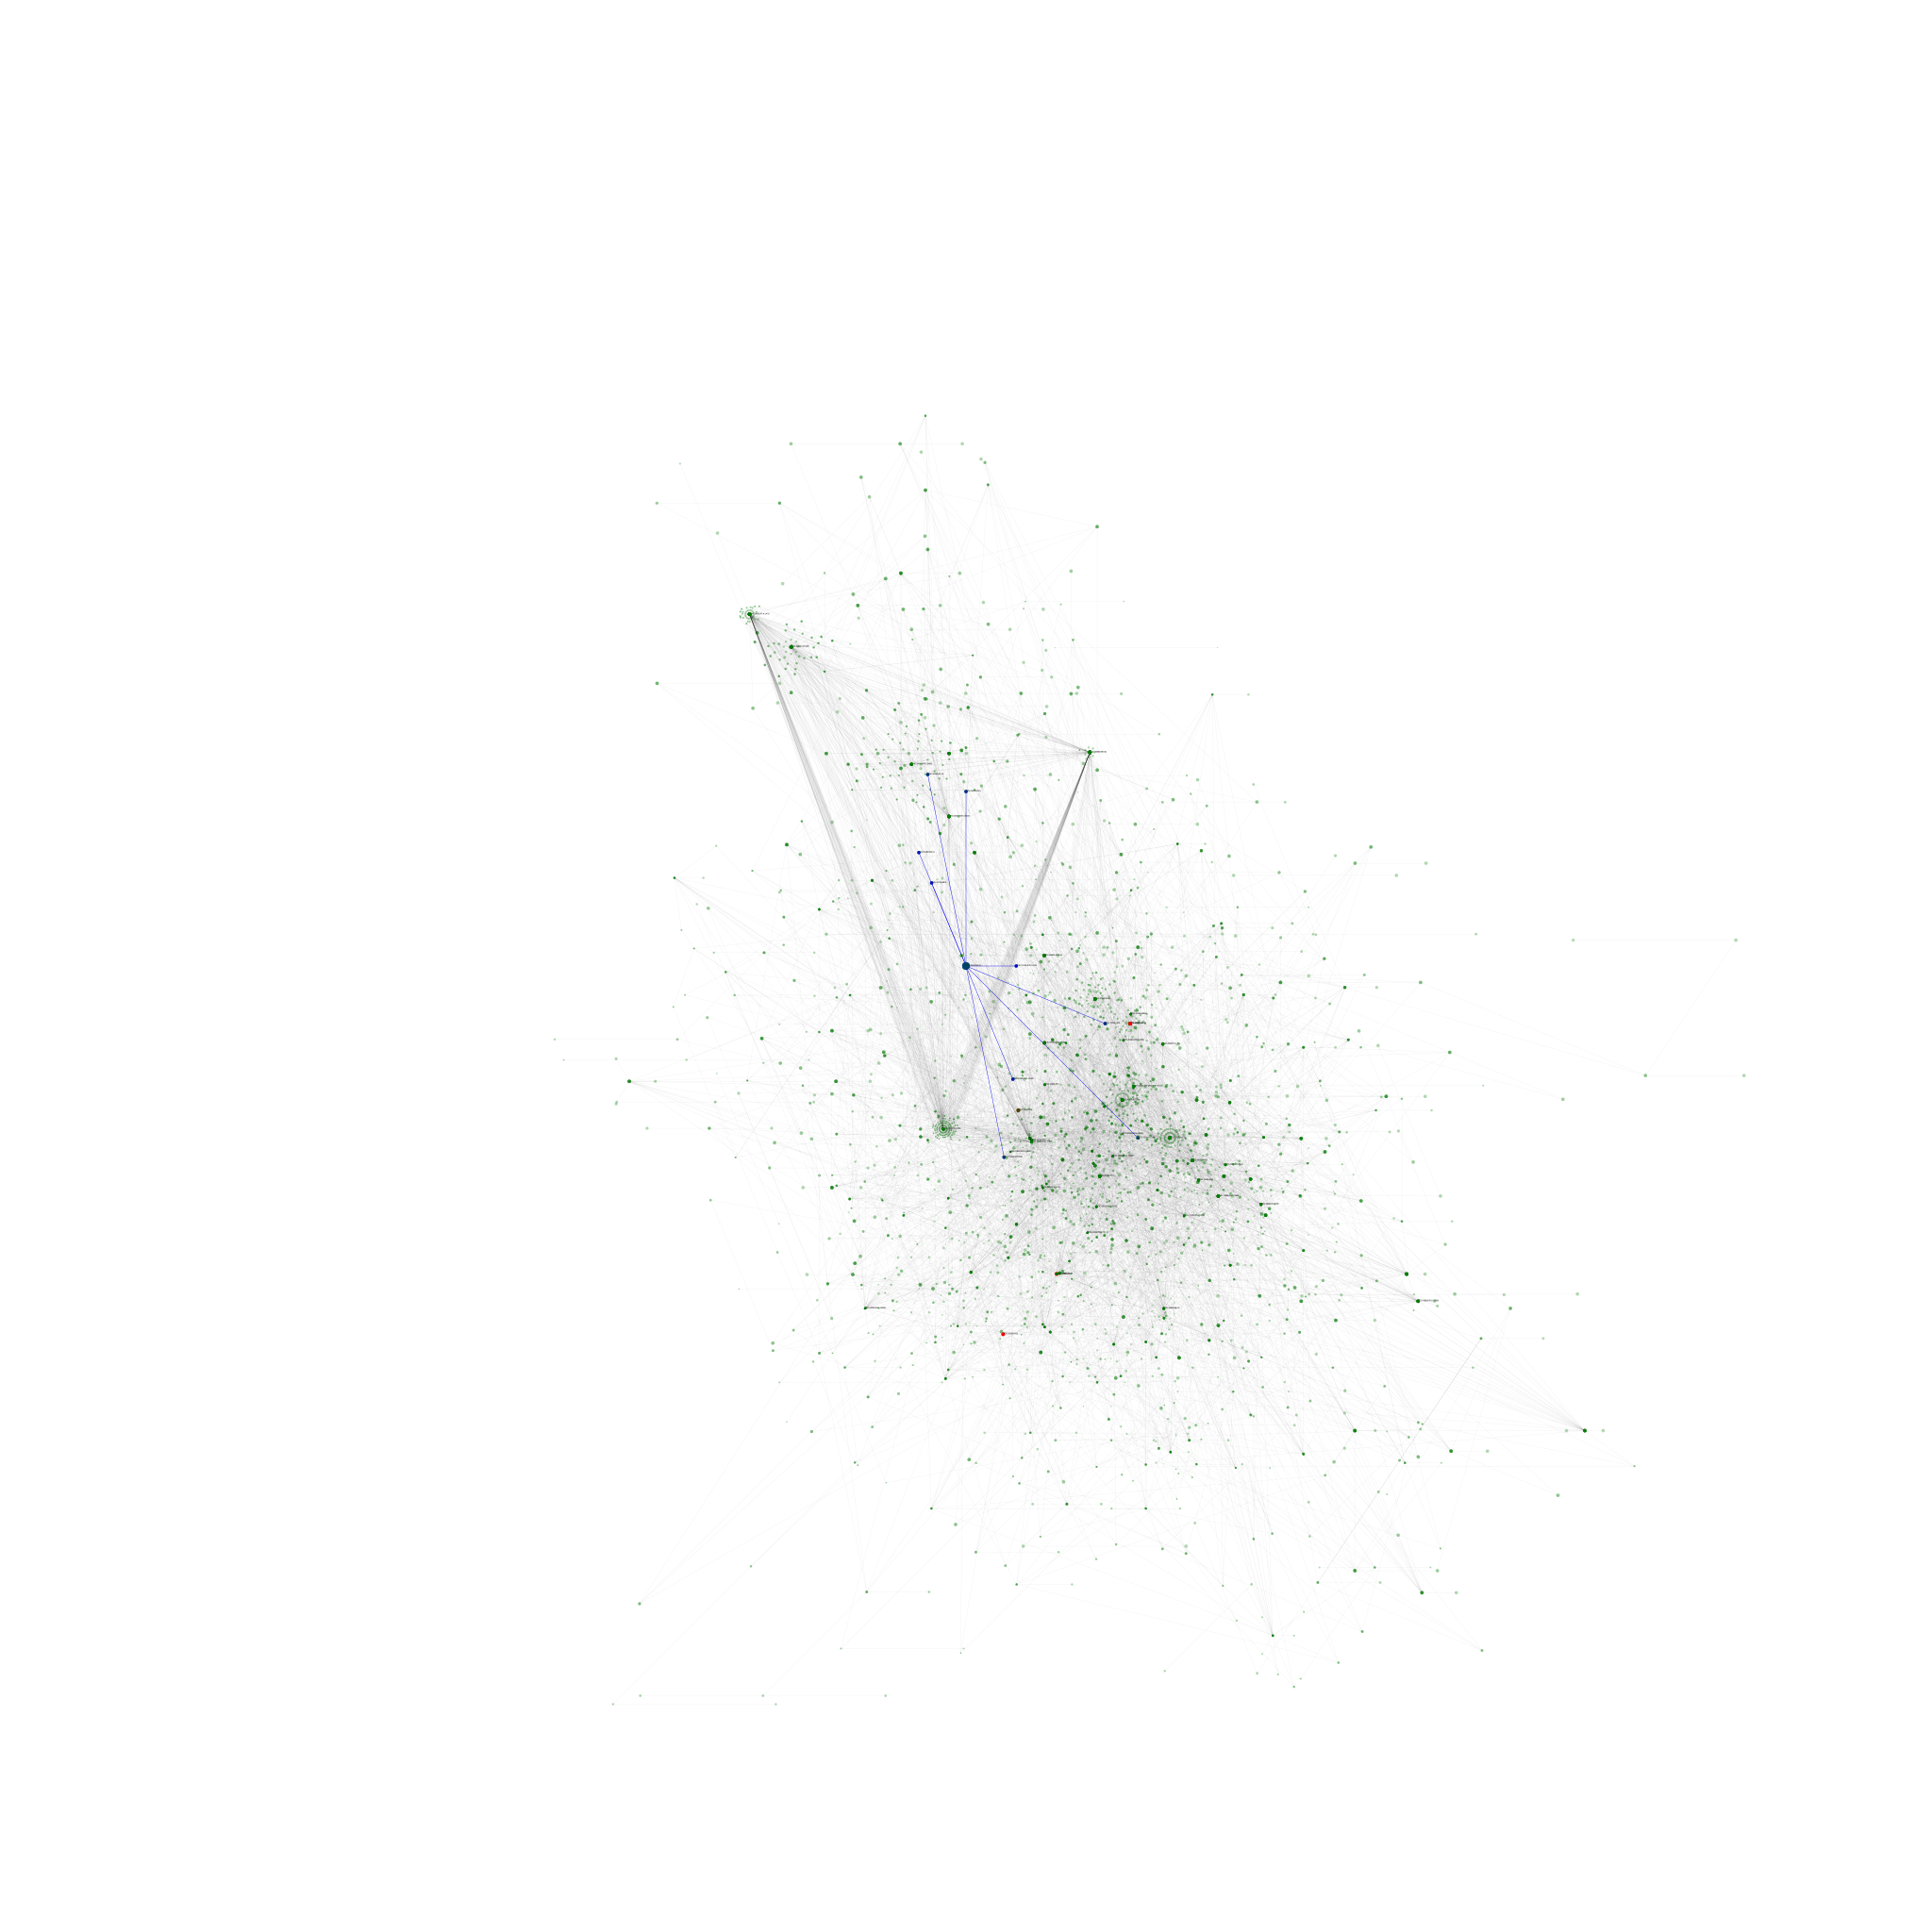

In [475]:

genename        = 'AT2G01570'
init_genenumber = dicG2N[genename]
Outfile = open('%s.%s.netviz.svg'%(genename,get_symbol(genename)),'w')
print('<svg xmlns:xlink="http://www.w3.org/1999/xlink" height="%d" width="%d">'%(canvas_height,canvas_width),file=Outfile)

circle = '<circle cx="%d" cy="%d" r="%d" \
              style="fill:%s;stroke:black;stroke-width:0;fill-opacity:%f;stroke-opacity:0.9" id="%s" />'
line   = '<line x1="%d" y1="%d" x2="%d" y2="%d" style="stroke:%s;stroke-width:%d;stroke-opacity:%f" />' 
text   = '<text text-anchor="middle" x="%d" y="%d" fill="black" font-size="%dpx">%s</text>'
text_l = '<text text-anchor="left" x="%d" y="%d" fill="black" font-size="%dpx">%s</text>'
text_i = '<text text-anchor="middle" x="%d" y="%d" fill="black" font-size="%dpx" font-style = "italic">%s</text>'

color_v = 'green'
color_s = 'red'
color_a = 'blue'

dicN2pos = {}
dicEdge2b = {}
#for genenumber in dicN2degree_each_cluster_key[0]:
#if 1:
#    genenumber               = dicN2degree_each_cluster_key[0]
def draw_net(genenumber,option=(start_x,start_y,rad_size),selected_genelist=[]):
    #print(genenumber,option)
    xaxis, yaxis, irad_size  = option
    gravity                  = dicN2degree[genenumber]
    if gravity > 30:
        print(text_l%(xaxis,yaxis,10,"%s(%s)"%(dicN2G[genenumber],get_symbol(dicN2G[genenumber]))),file = Outfile)
    if option != (start_x,start_y,rad_size) and gravity <2:
        return 0
    #print(gravity)
    #print([x for x in g.get_edgelist() if genenumber in x])
    #print([np.array(x)[(np.array(x)!=genenumber)] for x in g.get_edgelist() if genenumber in x])
    def get_interactors(genenumber):
        result = []
        for x,y in g.get_edgelist():
            if genenumber in (x,y) and x == y:
                result.append(x)
            elif genenumber in (x,y) and x != y:
                result.append(np.array([x,y])[(np.array([x,y])!=genenumber)][0])
        return result
    interactors_list         = get_interactors(genenumber)
    interactors_gravity_list = [dicN2degree[x] for x in interactors_list]
    edge_l_list              = ['%0.3f'%(float(min(gravity,gravity_i))/float(gravity + gravity_i)) for gravity_i in interactors_gravity_list]
    #edge_l_list_copy         = np.array(edge_l_list).copy()
    #all corresponding to the interactors 
    #print(interactors_list,edge_l_list)
    dicEdge2theta_interval   = dict(zip(list(set(edge_l_list)),[2*np.pi/edge_l_list.count(x) for x in set(edge_l_list)]))
    dicEdge2interactors      = {}
    for i, edge_l in enumerate(edge_l_list):
        try:
            dicEdge2interactors[edge_l].append(interactors_list[i])
        except KeyError:
            dicEdge2interactors[edge_l] = [interactors_list[i]]
    dicEdge2interactors_keys =  dicEdge2interactors.keys()
    dicEdge2interactors_keys.sort()
    for j,edge_l in enumerate(dicEdge2interactors_keys):
        theta_interval = dicEdge2theta_interval[edge_l]
        interactors    = dicEdge2interactors[edge_l]
        for i, interactor in enumerate(interactors):
            theta = (theta_interval*j)/3.2 + (theta_interval*i)
            #print(l,theta)
            #l     = sin_modify(float(edge_l),5)*max_d + min_d
            try:
                (x1,y1,size) = dicN2pos[interactor]
                print(circle%(x1,y1,size,color_v,0.1,"two"),file=Outfile)
            except KeyError:
                l                    = float(edge_l)*max_d + min_d
                x1                   = xaxis + l*np.cos(theta)
                y1                   = yaxis - l*np.sin(theta)
                size                 = irad_size*(sigmoid(theta_interval)) 
                dicN2pos[interactor] = (x1,y1,size)
                genename             = dicN2G[interactor]
                if option == (start_x,start_y,rad_size):
                    print(circle%(x1,y1,size,color_a,1,'two'),file=Outfile) # initial gene mark
                    print(text_l%(x1,y1,10,"%s(%s)"%(dicN2G[interactor],get_symbol(dicN2G[interactor]))),file = Outfile)
                else:
                    if genename in selected_genelist:
                        print(circle%(x1,y1,rad_size,color_s,1,'one'),file=Outfile)
                        print(text_l%(x1,y1,10,"%s(%s)"%(dicN2G[interactor],get_symbol(dicN2G[interactor]))),file = Outfile)
                        
                    else:
                        print(circle%(x1,y1,size,color_v,0.3,'two'),file=Outfile)
                
            edge  = [genenumber,interactor]
            edge.sort()
            
            try:
                if dicEdge2b[tuple(edge)]:
                    pass
            except KeyError:
                dicEdge2b[tuple(edge)] = 1
                if option == (start_x,start_y,rad_size): 
                    print(line%(xaxis,yaxis,x1,y1,color_a,2,1),file=Outfile) # initial link mark
                else:
                    print(line%(xaxis,yaxis,x1,y1,'black',1,0.1),file=Outfile)
    if option == (start_x,start_y,rad_size):
        dicN2pos[genenumber] = (xaxis,yaxis,rad_size*2)
        print(circle%(xaxis,yaxis,rad_size*2,color_a,1,'two'),file=Outfile)
        print(text_l%(xaxis,yaxis,10,"%s(%s)"%(dicN2G[genenumber],get_symbol(dicN2G[genenumber]))),file = Outfile)
    return 1
    
    #return interactors_list

selected_genelist = ['AT2G01570','AT1G14920','AT3G03450','AT1G66350','AT5G17490','AT5G24660','AT5G24655','AT3G49570','AT3G49580'] + \
 ['AT4G17870','AT5G46790','AT2G26040','AT1G73000','AT5G05440','AT2G40330','AT4G01026','AT2G38310','AT5G53160','AT1G01360','AT4G27920','AT5G45870','AT5G45860','AT4G18620']

draw_net(init_genenumber)
todolist = each_cluster_genenumber_list
done     = []
while len(dicN2pos.keys()) != len(each_cluster_genenumber_list):
    #print('!')
    b = 0
    for genenumber in todolist:
        if genenumber in done:
            continue
        try:
            b += draw_net(genenumber, dicN2pos[genenumber], selected_genelist)
            done.append(genenumber)
            #print(len(dicN2pos.keys()))
        except KeyError:
            pass
    if b == 0:
        break
        
'''
while interactor_list != []:
    new_interactor = []
    for interactor  in interactor_list:
        try:
            new_interactor += draw_net(interactor,dicN2pos[interactor])
        except KeyError:
            print(interactor)
            new_interactor += draw_net(interactor)
    interactor_list = new_interactor
    #print(new_interactor)
'''     


    
    
    
print('''<use id="use" xlink:href="#one" />
      </svg>''',file=Outfile)            
Outfile.close()

display(SVG('%s.%s.netviz.svg'%(genename,get_symbol(genename))))             

        